**Importing Necessary Libraries**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Reshape
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model
from keras.layers import LeakyReLU
import numpy as np

**Loading the Dataset**

In [2]:
(trainx, trainy), (testx, testy) = load_data()

170500096/170498071 [==============================] - 6041s 35us/step


**Defining Discriminator Model**

In [3]:
def define_discriminator(in_shape = (32,32,3)):
  model = Sequential()
  model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))
  opt = Adam(learning_rate=0.002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model


In [4]:
model = define_discriminator()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         2

**Preprocessing the Dataset**

In [5]:
def load_images():
  (trainx, trainy), (testx, testy) = load_data()
  X = trainx.astype('float32')
  X = (X - 127.5) / 127.5
  return X

**Choose Randomly, images from the Dataset And lebeled them as 1**

In [6]:
def real_samples(dataset, n_samples):
  ix = np.random.randint(0, dataset.shape[0], n_samples)
  X = dataset[ix]
  y = np.ones((n_samples, 1))
  return X, y

**Generate fake images and lebeled them as 0**

In [7]:
def fake_samples(n_samples):
  X = np.random.rand(32*32*3*n_samples)
  X = (X - 127.5) / 127.5
  X = X.reshape((n_samples, 32, 32, 3))
  y = np.zeros((n_samples, 1))
  return X, y

**Train the Discriminator Model**

In [8]:
def train_discriminator(model, dataset, n_iter=100, n_batch=128):
  half_batch = int(n_batch / 2)
  for i in range(n_iter):
    X_real, y_real = real_samples(dataset, half_batch)
    _, real_acc = model.train_on_batch(X_real, y_real)
    X_fake, y_fake = fake_samples(half_batch)
    _, fake_acc = model.train_on_batch(X_fake, y_fake)
    print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [9]:
dataset = load_images()

In [10]:
train_discriminator(model, dataset)

>1 real=64% fake=0%
>2 real=84% fake=5%
>3 real=91% fake=100%
>4 real=92% fake=100%
>5 real=98% fake=100%
>6 real=94% fake=100%
>7 real=98% fake=100%
>8 real=97% fake=100%
>9 real=97% fake=100%
>10 real=98% fake=100%
>11 real=98% fake=100%
>12 real=100% fake=100%
>13 real=100% fake=100%
>14 real=100% fake=100%
>15 real=100% fake=100%
>16 real=97% fake=0%
>17 real=97% fake=98%
>18 real=92% fake=100%
>19 real=95% fake=0%
>20 real=97% fake=100%
>21 real=92% fake=92%
>22 real=94% fake=100%
>23 real=94% fake=100%
>24 real=97% fake=100%
>25 real=94% fake=100%
>26 real=95% fake=52%
>27 real=94% fake=100%
>28 real=98% fake=100%
>29 real=94% fake=100%
>30 real=98% fake=100%
>31 real=100% fake=100%
>32 real=98% fake=100%
>33 real=100% fake=0%
>34 real=97% fake=100%
>35 real=95% fake=100%
>36 real=95% fake=100%
>37 real=95% fake=0%
>38 real=100% fake=100%
>39 real=100% fake=100%
>40 real=100% fake=100%
>41 real=100% fake=100%
>42 real=100% fake=100%
>43 real=100% fake=100%
>44 real=100% fake=100%

**Defining the Generator Model**

In [11]:
def define_generator(latent_dim):
  model = Sequential()
  n_nodes = 256 * 4 * 4

  model.add(Dense(n_nodes, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((4, 4, 256)))
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
  return model


In [12]:
model = define_generator(100)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4096)              413696    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 4096)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 128)         524416    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 128)       262272    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 16, 16, 128)      

**Generate points in latent space as input for the generator**

In [13]:
def generate_latent_points(latent_dim, n_samples):
  x_input = np.random.randn(latent_dim * n_samples)
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input

In [14]:
x = generate_latent_points(100, 64)
print(x.shape)

(64, 100)


**Use the generator to generate n fake examples, with class labels**

In [15]:
def generate_fake_samples(g_model, latent_dim, n_samples):
  x_input = generate_latent_points(latent_dim, n_samples)
  X = g_model.predict(x_input)
  y = np.zeros((n_samples, 1))
  return X, y

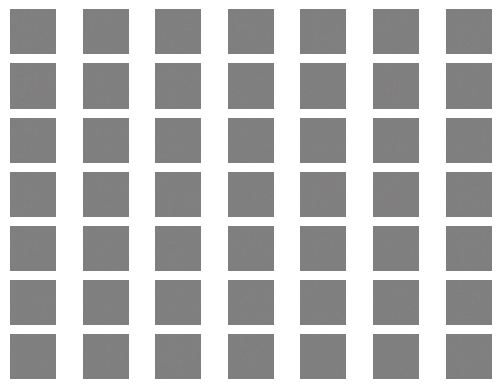

In [16]:
latent_dim = 100
model = define_generator(latent_dim)
n_samples = 49
X, _ = generate_fake_samples(model, latent_dim, n_samples)
X = (X + 1) / 2.0
for i in range(n_samples):
  plt.subplot(7, 7, 1 + i)
  plt.axis('off')
  plt.imshow(X[i])
plt.show()

**define the combined generator and discriminator model, for updating the generator**

In [17]:
def define_gan(g_model, d_model):
  d_model.trainable = False
  model = Sequential()
  model.add(g_model)
  model.add(d_model)
  opt = Adam(learning_rate=0.002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt)
  return model

In [18]:
latent_dim = 100
d_model = define_discriminator()
g_model = define_generator(latent_dim)
# Create GAN Model
gan_model = define_gan(g_model, d_model)
gan_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 32, 32, 3)         1466115   
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 522497    
Total params: 1,988,612
Trainable params: 1,466,115
Non-trainable params: 522,497
_________________________________________________________________


In [19]:
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
  X_real, y_real = real_samples(dataset, n_samples)
  _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
  x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
  _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
  print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
  save_plot(x_fake, epoch)
  filename = 'generator_model_%03d.h5' % (epoch + 1)
  g_model.save(filename)

In [20]:
def save_plot(examples, epoch, n=7):
  examples = (examples + 1) / 2.0
  for i in range(n * n):
    plt.subplot(n, n, 1 + i)
    plt.axis('off')
    plt.imshow(examples[i])
    filename = 'generated_plot_e%03d.png' % (epoch+1)
  plt.savefig(filename)
  plt.close()

In [21]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128):
  bat_per_epo = int(dataset.shape[0] / n_batch)
  half_batch = int(n_batch / 2)
  for i in range(n_epochs):
    for j in range(bat_per_epo):
      X_real, y_real = real_samples(dataset, half_batch)
      d_loss1, _ = d_model.train_on_batch(X_real, y_real)
      X_fake, y_fake = fake_samples(half_batch)
      d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
      X_gan = generate_latent_points(latent_dim, n_batch)
      y_gan = np.ones((n_batch, 1))
      g_loss = gan_model.train_on_batch(X_gan, y_gan)
      print('i', i+1, 'j', j+1, 'bat per epo: ', bat_per_epo, 'd_loss1:', d_loss1, 'd_loss2:', d_loss2, 'g_loss', g_loss)
    if (i+1) % 10 == 0:
        summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [22]:
type(dataset)

numpy.ndarray

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [23]:
train(g_model, d_model, gan_model, dataset, latent_dim)

i 1 j 1 bat per epo:  390 d_loss1: 0.7011652588844299 d_loss2: 3.3163464069366455 g_loss 0.7023710608482361
i 1 j 2 bat per epo:  390 d_loss1: 0.7907363176345825 d_loss2: 0.4754140377044678 g_loss 0.5062060356140137
i 1 j 3 bat per epo:  390 d_loss1: 0.43250876665115356 d_loss2: 0.11658135056495667 g_loss 1.3221508306585084e-12
i 1 j 4 bat per epo:  390 d_loss1: 0.22981877624988556 d_loss2: 0.014164309948682785 g_loss 0.0
i 1 j 5 bat per epo:  390 d_loss1: 0.10675324499607086 d_loss2: 0.015395857393741608 g_loss 0.0
i 1 j 6 bat per epo:  390 d_loss1: 0.0713391825556755 d_loss2: 0.016621559858322144 g_loss 0.0
i 1 j 7 bat per epo:  390 d_loss1: 0.06204196810722351 d_loss2: 0.016598552465438843 g_loss 0.0
i 1 j 8 bat per epo:  390 d_loss1: 0.01539897732436657 d_loss2: 0.006939576007425785 g_loss 0.0
i 1 j 9 bat per epo:  390 d_loss1: 0.09957189857959747 d_loss2: 0.014714113436639309 g_loss 0.0
i 1 j 10 bat per epo:  390 d_loss1: 0.017645951360464096 d_loss2: 0.010612547397613525 g_loss 0

KeyboardInterrupt: 